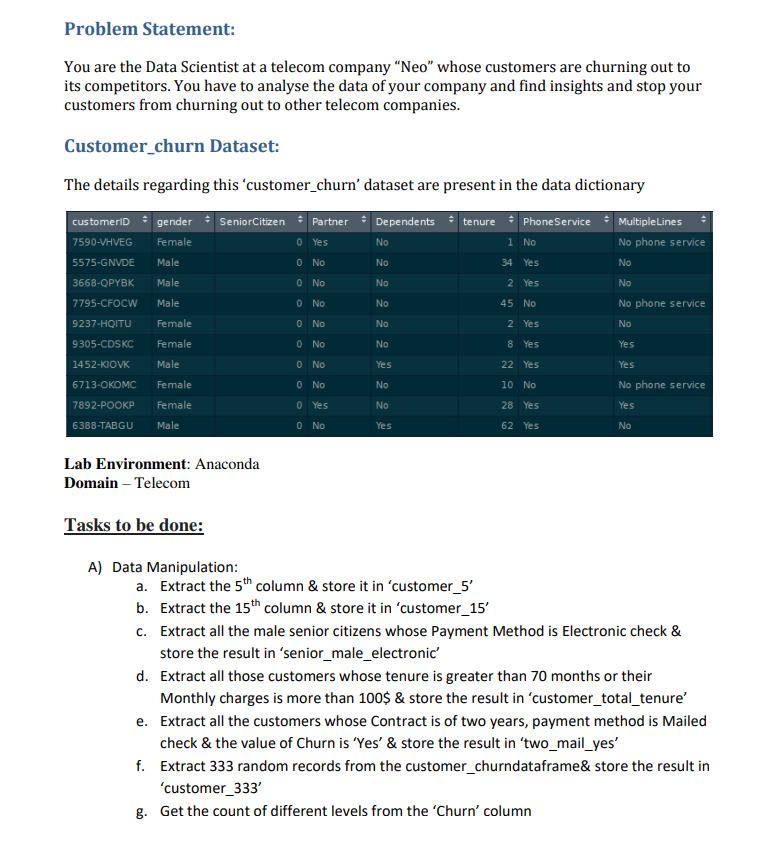

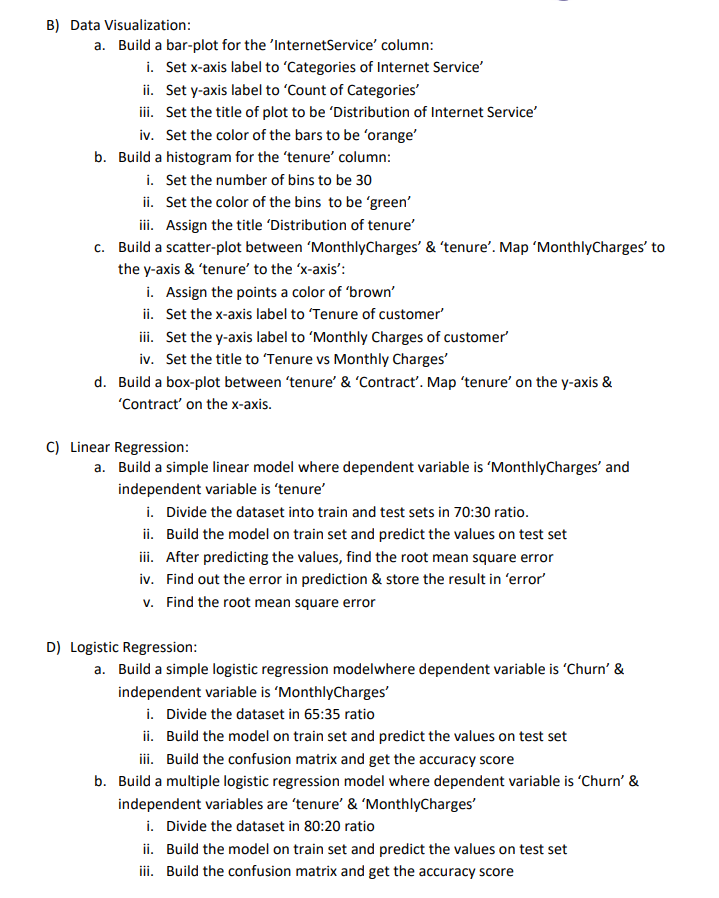

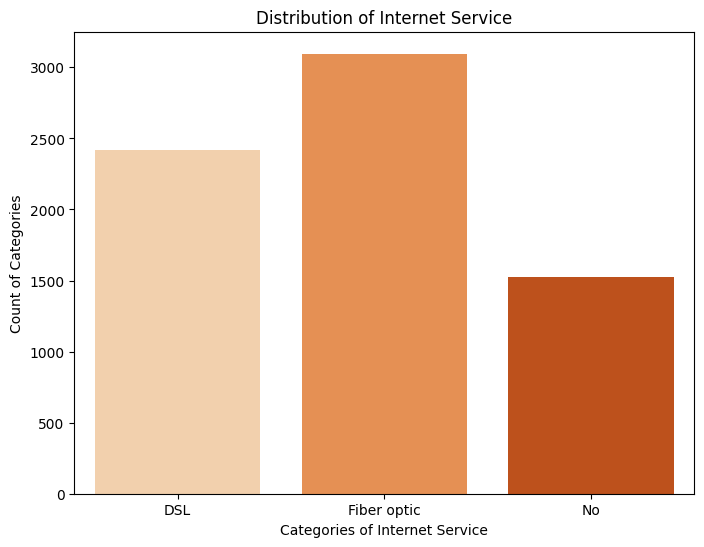

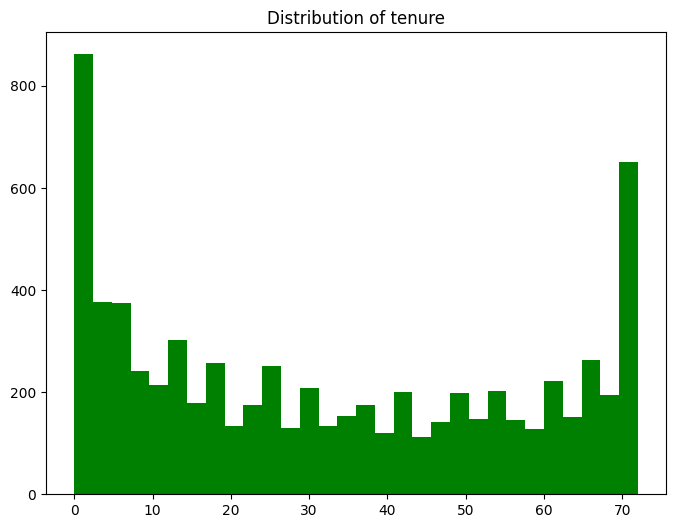

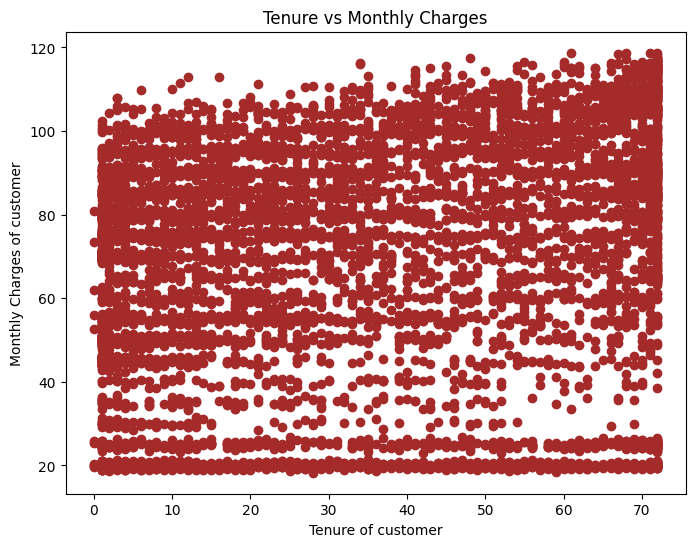

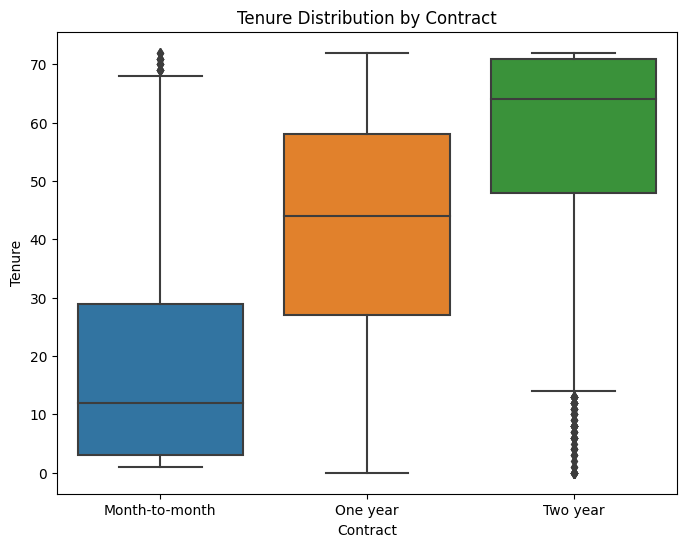

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Load the customer_churn dataset
customer_churn = pd.read_csv('/content/customer_churn.csv')

# A) Data Manipulation
customer_5 = customer_churn.iloc[:, 4]
customer_15 = customer_churn.iloc[:, 14]

senior_male_electronic = customer_churn[(customer_churn['gender'] == 'Male') &
                                        (customer_churn['SeniorCitizen'] == 1) &
                                        (customer_churn['PaymentMethod'] == 'Electronic check')]

customer_total_tenure = customer_churn[(customer_churn['tenure'] > 70) |
                                       (customer_churn['MonthlyCharges'] > 100)]

two_mail_yes = customer_churn[(customer_churn['Contract'] == 'Two year') &
                              (customer_churn['PaymentMethod'] == 'Mailed check') &
                              (customer_churn['Churn'] == 'Yes')]

customer_333 = customer_churn.sample(n=333)

churn_count = customer_churn['Churn'].value_counts()

# B) Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=customer_churn, palette='Oranges')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(customer_churn['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(x='tenure', y='MonthlyCharges', data=customer_churn, color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='tenure', data=customer_churn)
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure Distribution by Contract')
plt.show()

# C) Linear Regression
X = customer_churn[['tenure']]
y = customer_churn['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = mean_squared_error(y_test, y_pred)

# D) Logistic Regression
X = customer_churn[['MonthlyCharges']]
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

X = customer_churn[['tenure', 'MonthlyCharges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_multi_model = LogisticRegression()
logreg_multi_model.fit(X_train, y_train)
y_pred_multi = logreg_multi_model.predict(X_test)

conf_matrix_multi = confusion_matrix(y_test, y_pred_multi)
accuracy_multi = accuracy_score(y_test, y_pred_multi)
